<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library Dasar
Sebelum melakukan analisis dan membangun model Neural Network, kita perlu memanggil pustaka
(library) Python yang akan digunakan dalam proses data preprocessing, visualisasi, dan modeling.

In [ ]:
#import modul library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

## Menghubungkan GDrive

Folder yang di simpam dihubungkan dengan drive agar bisa mengambil dataset titanic di dalam folder data

In [ ]:
# menghubungkan dengan google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Dataset
Dataset yang digunakan pada praktikum ini adalah Titanic Dataset, yang berisi data demografis dan sosial
ekonomi penumpang kapal Titanic. Dataset dimuat menggunakan fungsi pd.read_csv() dari pustaka
Pandas.

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum_13/Data/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Business understanding
*   Tujuan

untuk membantu perusahaan pelayanan atau pihak terkait memahami faktor-faktor
yang memengaruhi keselamatan penumpang, serta memprediksi kemungkinan selamatnya penumpang berdasarkan karakteristik tertentu.

* Manfaat

memberikan insight untuk perbaikan sisyem keselamatan dimasa depan.
dapat di gunakan untuk pelatihan model prediksi pada kasus serupa di industri transportasi.

* output model: prediksi selamat(1) dan tidak selamat(0) untuk setiap penumpang berdasarkan fitur input

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Pemeriksaan Missing Values (Data Kosong)
Pemeriksaan nilai kosong dilakukan menggunakan fungsi df.isnull().sum().
Dari hasil analisis, ditemukan tiga kolom yang memiliki nilai kosong

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##Data Cleaning
Fungsi df.drop() digunakan untuk menghapus kolom yang dianggap kurang relevan atau memiliki terlalu
banyak nilai kosong.


In [ ]:
#drop colom
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

<Axes: >

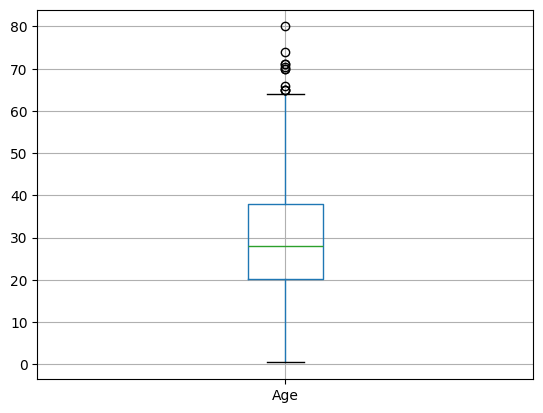

In [ ]:
df.boxplot(column=['Age'])

 Mengisi Nilai Kosong pada Kolom Age dengan Median

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
#replace missing value  ' embarked' colum wite mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3857046018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
#ubah data string menjadi numerik
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S':0, 'C':1, 'Q':2}
}
df.replace(replacements, inplace=True)

/tmp/ipython-input-3301836442.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


#2. Pra-pemrosesan Data

##Split Data

In [ ]:
#Membagi data x dan y
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
#Transform data
scaled = RobustScaler()
X_scaled = scaled.fit_transform(X)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape

(712, 7)

In [ ]:
X_train.shape[1]

7

In [ ]:
# pembuatan model neural network (arsiteltur ann)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()

#Hidden layer 1
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

#Dropout untuk mengurangi overviting
model.add(Dropout(0.3))

#Hidden layer 2
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

#Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#kompilasi model dan ringkasan arsitektur
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#early stopping (pencegahan overfitting selama training )
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
#training model neutral network
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5539 - loss: 0.7982 - val_accuracy: 0.6923 - val_loss: 0.6619
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5743 - loss: 0.6994 - val_accuracy: 0.7343 - val_loss: 0.6387
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6418 - loss: 0.6761 - val_accuracy: 0.7483 - val_loss: 0.6173
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7107 - loss: 0.6364 - val_accuracy: 0.7413 - val_loss: 0.5983
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6668 - loss: 0.6370 - val_accuracy: 0.7483 - val_loss: 0.5807
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7123 - loss: 0.6083 - val_accuracy: 0.7622 - val_loss: 0.5656
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7079 - loss: 0.6033 - val_accuracy: 0.7622 - val_loss: 0.5445
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7619 - loss: 0.5398 - val_accuracy: 0.7622 - v

In [ ]:
#evaluasi model (Testing Data)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8188 - loss: 0.4002 
Test Loss: 0.4106
Test Accuracy: 80.45%


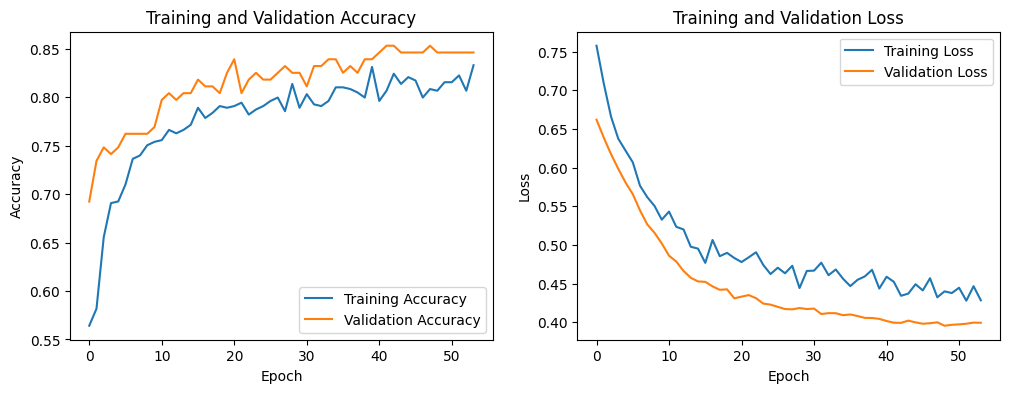

In [ ]:
#Visualisasi hasil pelatihan (accuracy dan los)
plt.figure(figsize=(12,4))

#Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Praktikum di kelas

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Praktikum_ML/Praktikum_13/Data/titanic_cleaned.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [ ]:
#isi nilai kosong di kolom Fare dengan median
df1['Fare'].fillna(df1['Fare'].median(), inplace=True)

#ubah data menjadi numerik
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S':0, 'C':1, 'Q':2}
}
df1.replace(replacements, inplace=True)

/tmp/ipython-input-1545413872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Fare'].fillna(df1['Fare'].median(), inplace=True)


In [ ]:
#Membagi data x dan y
X2 = df1.drop('Survived', axis=1)
y2 = df1['Survived']

In [ ]:
#Transform data
scaled = RobustScaler()
X_scaled2 = scaled.fit_transform(X2)

In [ ]:
#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_scaled2, y2, test_size=0.2, random_state=42
)

In [ ]:
model = Sequential()

#Hidden layer 1
model.add(Dense(16, activation='relu', input_shape=(X2_train.shape[1],)))

#Hidden layer 2
model.add(Dense(8, activation='relu'))


#Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

#menampilkan ringkasan
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#kompilasi model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#training model
history = model.fit(X2_train, y2_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 2.3824e-04 - val_accuracy: 1.0000 - val_loss: 4.5608e-04
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.7808e-04 - val_accuracy: 1.0000 - val_loss: 4.4826e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.6032e-04 - val_accuracy: 1.0000 - val_loss: 4.4141e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.7639e-04 - val_accuracy: 1.0000 - val_loss: 4.3663e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.7064e-04 - val_accuracy: 1.0000 - val_loss: 4.2795e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.4512e-04 - val_accuracy: 1.0000 - val_loss: 4.1950e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.4035e-04 - val_accuracy: 1.0000 - val_loss: 4.1506e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - ac

In [ ]:
# evaluasi model
loss, accuracy = model.evaluate(X2_test, y2_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Loss: 0.0002
Test Accuracy: 100.00%


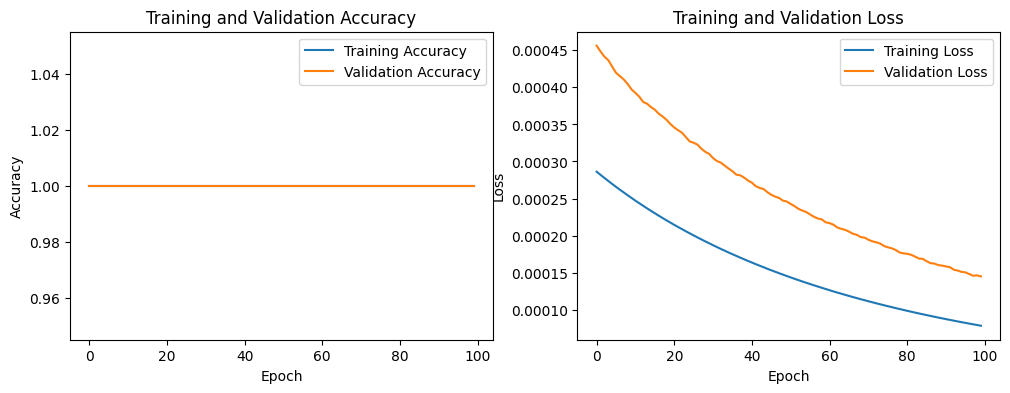

In [ ]:
#Visualisasi hasil pelatihan (accuracy dan los)
plt.figure(figsize=(12,4))

#Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()